# Common Statistical Tests 1
### (Case Study)

### Problem Statement
Business Context
AZ Tunes is a music streaming company and they analyze customer data to improve
recommendations, playlists, and rollout special offers. Their persistent work to uncover and act
upon evolving customer expectation has resulted in higher customer engagement time and
subscription to their paid service. 

### Objective
The Marketing team of AZ Tunes wants to rollout special offers through a new campaign. As a data
scientist, your objective is to help the team design the campaign by providing the below data-driven
inputs:
* According to a study, the average weekly app engagement time of users in leading music
services is around 6 hrs. Can we claim that the app engagement time of AZ tunes is better
than this market standard?
* The team wants to spend their budget on the age group which has the highest chance of
subscribing as part of their campaign

+ You need to perform statistical analysis on a sample of customer data and provide an evidencebased conclusion to help the marketing campaign succeed. 

# Import libraries

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import scipy.stats as stats 
import scipy 


In [5]:
df = pd.read_csv('az_tunes.csv')

In [6]:
df.head()

,user_id,age_group,subscription_status,engagement_time
0,14451,18-34,subscribed,5.55
1,18386,under 18,subscribed,5.12
2,12305,35 and over,not_subscribed,4.25
3,17546,18-34,subscribed,8.54
4,15399,18-34,subscribed,12.12


In [8]:
df.shape

(1000, 4)

The dataset contains 1000 rows and 4 columns. 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              1000 non-null   int64  
 1   age_group            1000 non-null   object 
 2   subscription_status  1000 non-null   object 
 3   engagement_time      1000 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


There are 2 categorical columns and two numeric columns in the dataset. 

In [10]:
df.describe()

,user_id,engagement_time
count,1000.000000,1000.000000
mean,15024.803000,6.180030
std,2927.044957,2.757166
min,10000.000000,0.220000
25%,12452.500000,3.917500
50%,15184.000000,6.000000
75%,17481.250000,8.110000
max,19976.000000,16.980000


* The user_id is a column consisting of unique user-ids.
* The mean engagement-time is 6.18 hrs, while the median engagement-time is 6 hrs. 


# One Sample t-test

Is the average app engagement time of AZ Tunes significantly greater than the market average (6
hours)? 

Sample mean: 6.18


C:\Users\basha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


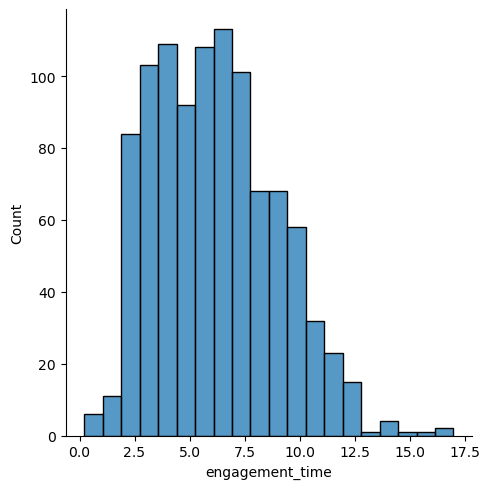

In [12]:
print('Sample mean:', np.round(df.engagement_time.mean(),2)) 
sns.displot(df.engagement_time)
plt.show() 


The distribution looks a little skewed to the right. 


### Step 1: Define null and alternative hypotheses
Let's frame the null and alternative hypothesis based on the above claim can be formulated as: 

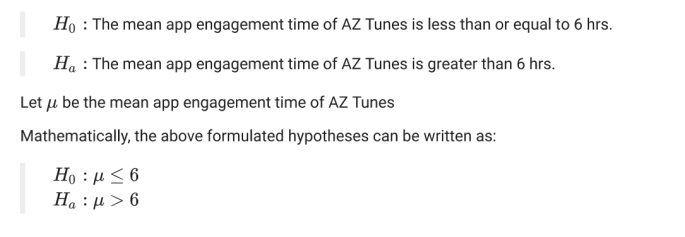

### Step 2: Select Appropriate test 
* This is a case of a one-tailed test for the significance of a single mean. As the population standard
deviation is unknown, a one-sample t-test will be appropriate to test the formulated hypotheses.
* In a one sample t-test, we compare a sample mean with a hypothesized population mean to check
if the sample mean differs significantly from the population mean.
We are provided that the sample is randomly selected and we assume that it has come from a
normally distributed population. 


### Step 3: Decide the significance level
Let's set the level of significane (alpha) as 0.05 

### Step 4: Calculate the p-value
* We will use the ttest_1samp() function from the scipy.stats library to perform a onesample t-test.
* The ttest_1samp() function takes the sample observations, hypothesized population mean
and the direction of the alternative hypothesis as input and returns the test statistic and the pvalue for the test.
* The sample observations are the values of app engagement time in the dataset.
* The hypotheisized population mean, as provided in the problem statement and defined
in the formulated hypotheses is 6 hours
* Asitis a one-tailed test towards the right, we will set the argument alternative =
'greater’ 

In [16]:
hyp_mean = 6
t_stat, p_value = stats.ttest_1samp(df['engagement_time'], hyp_mean, alternative='greater')
print('Test Statistic =',t_stat)
print('p-value =',p_value) 

Test Statistic = 2.0648187232381248
p-value = 0.019598877431817586


* Note: The type of test (one-tailed/two-tailed) has an effect on the p-value. The alternative
argument is set to 'greater’ as our alternative hypothesis states that mean app engagement
time of AZ Tunes is greater than the market average. 


#### The test statistic follows a t distribution.
Let's plot the distribution of the t-test statistic and see where the computed test statistic lies in the
plot. 

In [20]:
# plot the t-stat distribution
# import the required function
from scipy.stats import t 

* plotting the distribution of t test statistic along with the computed test statistic
* We are plotting the distributions here to better visualize the calculations 

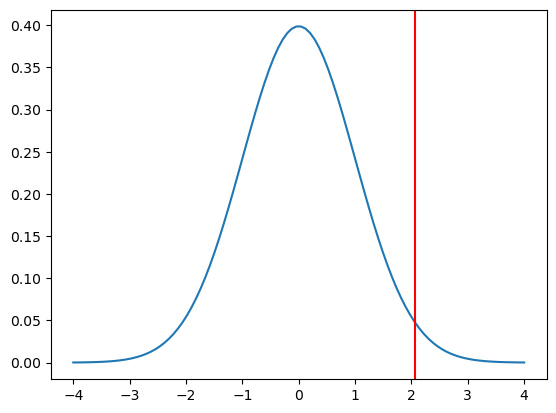

In [21]:
x = np.linspace(-4, 4, 100) 
plt.plot(x, t.pdf(x,df=len(df)-1)) 
plt.axvline(x = t_stat, c = 'r')
plt.show() 

Step 5: Compare the p-value with alpha

In [24]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the r')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to r') 

As the p-value 0.019598877431817586 is less than the level of significance, we reject the r


Step 6: Draw Inference
* Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we
have enough statistical evidence to say that the mean app engagement time of AZ tunes is greater
than the market average (6 hrs). 

# Chi-square Test for Independence 

In [25]:
# create a contingency table to tabulate the frequencies of the two categorical variables
pd.crosstab(df.age_group,df.subscription_status,margins=True) 

subscription_status,not_subscribed,subscribed,All
age_group,,,
18-34,103,262,365
35 and over,237,171,408
under 18,107,120,227
All,447,553,1000


* There are a total of 1000 people in the sample
* In the 18-34 age group, 262 out of 365 (or 71.78%) users are subscribed users.
* In the 35 and over age group, 171 out of 408 (41.91%) users are subscribed users.
* In the under 18 age group, 120 out of 227 (52.86%) users are subscribed users. 


<Axes: xlabel='age_group'>

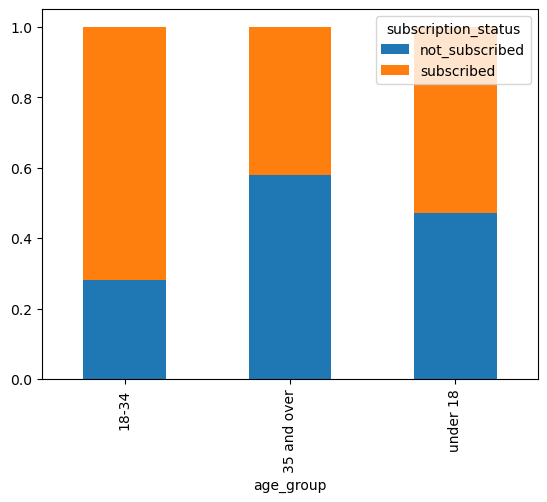

In [27]:
    # visual analysis
pd.crosstab(df['age_group'], df['subscription_status'], normalize='index').plot(kind='bar', stacked=True)


The proportion of subscribed users is higher in the age group 18-34 than the other two age
groups.
* Based on the sample data, we can infer that the proportion of subscribers is higher for one
age group, but is this difference significant enough to conclude that subscription status is
dependent on the age group? 


In [28]:
# prepare a contingency table to perform the test
contingency_table = pd.crosstab(df.age_group, df.subscription_status)
contingency_table 


subscription_status,not_subscribed,subscribed
age_group,,
18-34,103,262
35 and over,237,171
under 18,107,120


### Calculate the p-value
We will use the chi2_contingency function from the scipy stats library to perform the hypothesis
test. It takes the contingency table as an input and returns the test statistic, p-value, degrees of
freedom, and the expected frequencies as the output. 

In [29]:
# import the required test function
from scipy.stats import chi2_contingency
# calculate the test results
chi, p_value, dof, expected = chi2_contingency(contingency_table)
print("Test Statistic =",chi)
print("p-value =",p_value)
print("Degrees of freedom =",dof)
print("Expected frequencies \n", expected) 


Test Statistic = 70.23716243606756
p-value = 5.600076564450542e-16
Degrees of freedom = 2
Expected frequencies 
 [[163.155 201.845]
 [182.376 225.624]
 [101.469 125.531]]


Compare the p-value with alpha

In [31]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the r')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to r') 

As the p-value 5.600076564450542e-16 is less than the level of significance, we reject the r


Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we
have enough statistical evidence to say that age group and subscription_status are dependent on
each other. 

### Actionable Insights and Conclusions
* From the sample data, we observed that
+ 50% of the people spend at least 6 hours on an average per week on the AZ Tunes App
+ The average weekly app engagement time of AZ Tunes was 6.18 hours
* There is enough statistical evidence (p-value of 0.0196 at 5% level of significance) to conclude
that the average app engagement time of AZ Tunes is greater than the market average
* The difference in proportions of subscribers across the 3 age groups is significant enough (pvalue of 5.60 x 10%(-16) at 5% level of significance) to conclude that the age group 18-34 is
most likely to subscribe
+ AZ Tunes can focus more on designing the special offers for this age group to be used
in the marketing campaign 